In [1]:
import numpy as np
import pystan
import pandas as pd

In [83]:
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("historical_returns.csv")
df = df.drop("Symbol", axis = 1)
data = np.array(df)
data_dict = {"n":data.shape[1],"r":data[0]}

In [78]:
garch = """
data {
    int<lower=1> n;
    real r[n];
}
parameters{
    real b_0;
    real b_1;
    real omega;
    real betta;
    real alpha;
    real<lower=0, upper = 0.1> sigma_1;
}
    
transformed parameters {
    real eps[n-1];
    real sigma[n];
    sigma[1] = sigma_1;
    for(i in 1:n-1){
        eps[i] = (r[i+1] - b_0 - b_1*r[i])/ sigma[i];
        sigma[i+1] = sqrt(omega + betta*(pow(sigma[i],2)) + alpha*(pow(sigma[i],2)*(pow(eps[i],2))));
    }
}
model {
    //sigma[1] ~ normal(0,1000);
    //for(i in 2:n){
    //    pow(sigma[i],2) ~ normal(omega + betta*pow(sigma[i-1],2),alpha*pow(sigma[i-1],2));
    //}
    for(i in 2:n){
        r[i] ~ normal(b_0 + b_1*r[i-1],pow(sigma[i-1],2));
    }
    b_0 ~ normal(0,1000);
    b_1 ~ normal(0,1000);
    omega ~ normal(0,1000);
    betta ~ normal(0,1000);
    alpha ~ normal(0,1000);
    
    
}

"""


In [79]:
markov_sm = pystan.StanModel(model_code=garch)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7846e31811fbcf59599c8d7db3a3a2da NOW.


In [80]:
fit = markov_sm.sampling(data=data_dict, iter=1000, chains=5)

C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


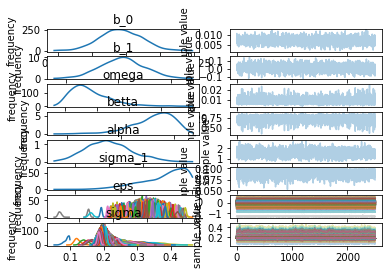

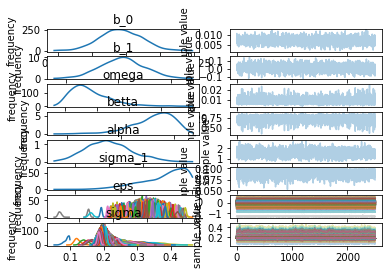

In [84]:
fit.plot()

In [155]:
sigmas = fit.extract()["sigma"].mean(axis = 0)
b_0 = fit.extract()["b_0"].mean(axis = 0)
b_1 = fit.extract()["b_1"].mean(axis = 0)

In [156]:
fit.extract()["alpha"].mean(axis = 0)

1.5062818925221286

In [157]:
b_0, b_1

(0.007110462366617108, 0.007230304249727985)

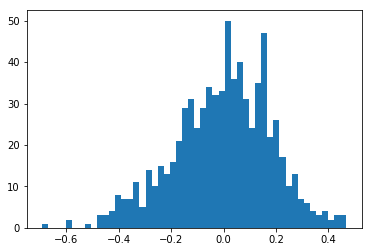

In [162]:
plt.hist(err / sigmas[1:], bins=50);

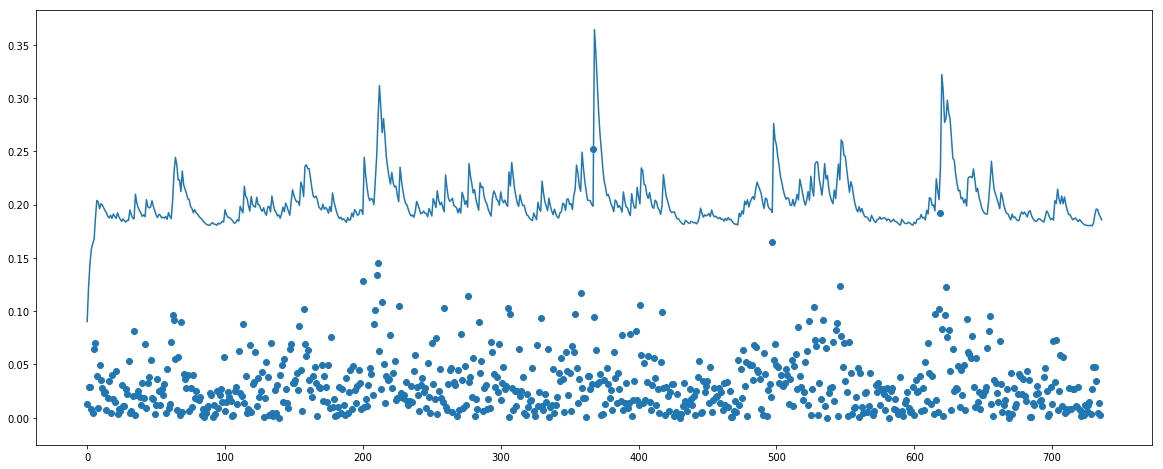

In [151]:
err = log_returns[1:] - b_0 - b_1 * log_returns[:-1]
plt.figure(figsize=(20, 8))
plt.scatter(np.arange(0, len(err)), abs(err))
plt.plot(sigmas)

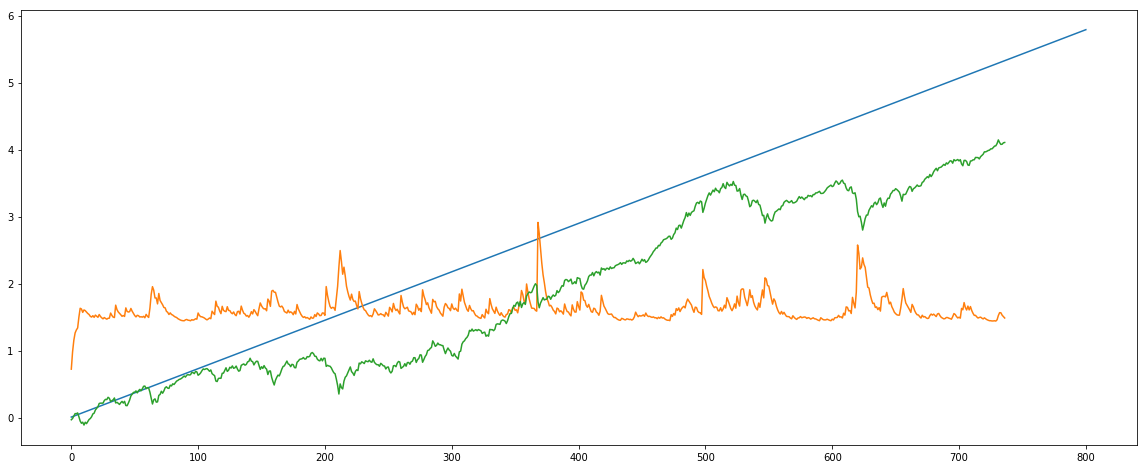

In [144]:
plt.figure(figsize=(20, 8))
plt.plot(8 * sigmas)
plt.plot(log_prices)

In [136]:
p = []
p.append(1)
print(p)
for i in range(data.shape[1]-1):
    price = np.exp(data[0][i+1]) * p[i]
    p.append(price)

[1]


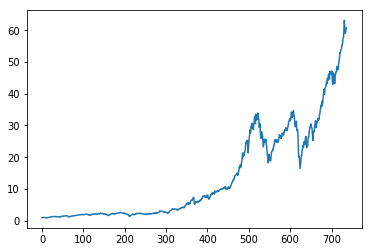

In [133]:
log_returns = data[0]
log_prices = np.cumsum(log_returns)
plt.plot(np.exp(log_prices))

In [129]:
data[0].min()

-0.24542803646311465